In [175]:
#Import Libraries 

#This program solves a regression problem of predicting brain age

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
#Import Data

path_to_file = "/Users/hunterpedersen/BMEN415/Volumetric_features (1).xlsx"
volData = pd.read_excel(path_to_file)
print(f'The dataset has {volData.shape[0]} rows and {volData.shape[1]} columns.')

The dataset has 4226 rows and 141 columns.


In [177]:
volData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


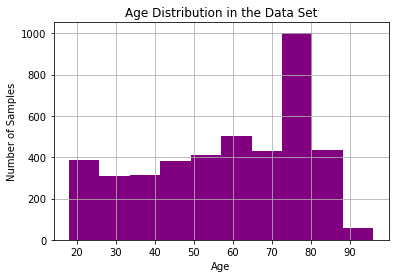

In [178]:
#Showcases Distribution of initial data

volData['Age'].hist(bins = 10, color = 'purple')
plt.title('Age Distribution in the Data Set')
plt.ylabel('Number of Samples')
plt.xlabel('Age')
plt.show()

<AxesSubplot:>

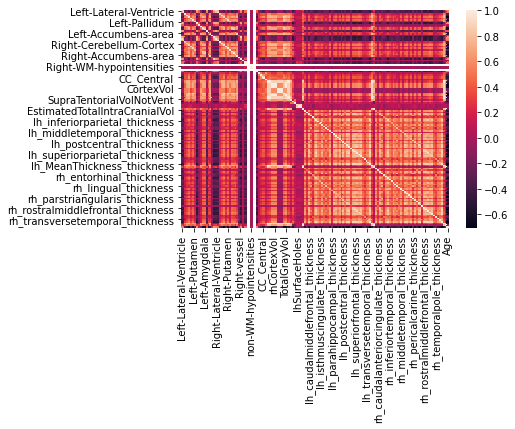

In [179]:
#Create Correlation Matrix

volData = volData.drop(columns = ['S.No', 'dataset'])
corrMat = volData.corr()
corrMat['Age']
sns.heatmap(corrMat, annot = False)


In [180]:
#Eliminating Features with low correlation 

targetCor = abs(volData.corr()['Age'])
dropFeatures = targetCor[targetCor < 0.15]
drop = dropFeatures.to_frame()
names = drop.index
listNames = list(names)
listNames.append('Age')
Y = volData['Age'].values
X = volData.drop(listNames, axis =1)
print("The relevant features are:")
print(targetCor)

The relevant features are:
Left-Lateral-Ventricle          0.569539
Left-Inf-Lat-Vent               0.496304
Left-Cerebellum-White-Matter    0.334077
Left-Cerebellum-Cortex          0.471327
Left-Thalamus                   0.696598
                                  ...   
rh_insula_thickness             0.547973
rh_MeanThickness_thickness      0.706354
BrainSegVolNotVent.2            0.530925
eTIV.1                          0.109157
Age                             1.000000
Name: Age, Length: 139, dtype: float64


In [181]:
#Preprocessing data check

volData.dtypes #types of data
volData.isna().sum() #check if any data is missing
volData.duplicated().sum(0) #check duplicated rows



0

In [182]:
#Importing Models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor



In [183]:
#Drop age and predict on it

x = volData.drop(['Age'], axis =1)
y = volData.iloc[:,138]
states = pd.get_dummies(x,drop_first=True)
x = pd.concat([x,states], axis=1)

#Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [184]:
#Linear Regression

LR = LinearRegression()
LR.fit(x_train, y_train)
y_prediction = LR.predict(x_test)




In [185]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [186]:
#Linear Regression Scores

Score = r2_score(y_test, y_prediction)
Mse = mean_squared_error(y_test, y_prediction)
Rmse = np.sqrt(Mse)

In [187]:
#Comparison of the Linear Regression with preprocessing (new feature space)

X_train, X_test, Y_train, Y_test =train_test_split(X,y, random_state=42, test_size = 0.2)
LR2 = LinearRegression()
LR2.fit(X_train, Y_train)
y_pred = LR2.predict(X_test)
ScorePre = r2_score(Y_test, y_pred)
MsePre = mean_squared_error(Y_test, y_pred)
RmsePre = np.sqrt(MsePre)

In [188]:
#KNN

KNN_Reg = KNeighborsRegressor(n_neighbors=10)
KNN = KNN_Reg.fit(x_train, y_train)
y2_prediction = KNN.predict(x_test)

In [189]:
#KNN Scores

Score2 = r2_score(y_test, y2_prediction)
Mse2 = mean_squared_error(y_test, y2_prediction)
Rmse2= np.sqrt(Mse2)

In [190]:
#Comparison of the Linear Regression with preprocessing (new feature space)

X_train, X_test, Y_train, Y_test =train_test_split(X,y, random_state=42, test_size = 0.2)
KNN2 = KNeighborsRegressor()
KNN2.fit(X_train, Y_train)
y_pred2 = KNN2.predict(X_test)
ScorePre2 = r2_score(Y_test, y_pred2)
MsePre2 = mean_squared_error(Y_test, y_pred2)
RmsePre2 = np.sqrt(MsePre2)

In [191]:
#Random Forest 

rand_Reg  = RandomForestRegressor()
rand_Reg.fit(x_train, y_train)
y3_prediction = rand_Reg.predict(x_test)

In [192]:
#Random Forest Scores

Score3 = r2_score(y_test, y3_prediction)
Mse3 = mean_squared_error(y_test, y3_prediction)
Rmse3= np.sqrt(Mse3)

In [193]:
#Comparison of the Linear Regression with preprocessing (new feature space)

X_train, X_test, Y_train, Y_test =train_test_split(X,y, random_state=42, test_size = 0.2)
rand_Reg2 = RandomForestRegressor()
rand_Reg2.fit(X_train, Y_train)
y_pred3 = rand_Reg2.predict(X_test)
ScorePre3 = r2_score(Y_test, y_pred3)
MsePre3 = mean_squared_error(Y_test, y_pred3)
RmsePre3 = np.sqrt(MsePre3)

Linear Regression r2 score is 0.8548730608688594
Linear Regression mean squared error is 59.52543455483328
Linear Regression root mean squared error is 7.715272811432742
Linear Regression r2 score with pre-processing is 0.8525558308966081
Linear Regression mean squared error with pre-processing is 60.475872301867255
Linear Regression root mean squared error with pre-processing is 7.7766234512072945
K-Nearest Neighbour r2 score is 0.7405890265112003
K-Nearest Neighbour mean squared error is 106.40030732860521
K-Nearest Neighbour root mean squared error is 10.315052463686513
K-Nearest Neighbour r2 score with pre-processing is 0.734971272835736
K-Nearest Neighbour mean squared error with pre-processing is 108.70449172576832
K-Nearest Neighbour root mean squared error with pre-processing is 10.426144624249575
Random Forest r2 score is 0.8787576781592413
Random Forest mean squared error is 49.728892080378245
Random Forest root mean squared error is 7.051871530337053
Random Forest r2 score w

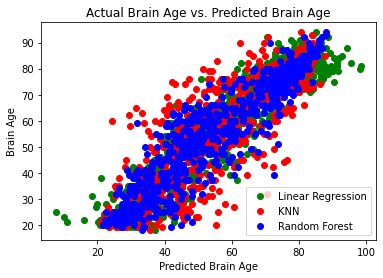

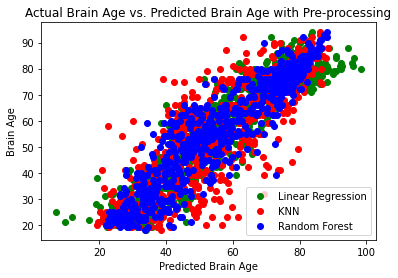

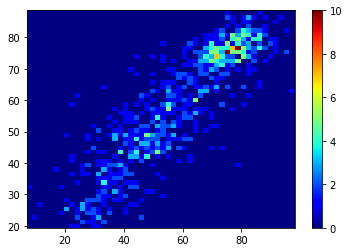

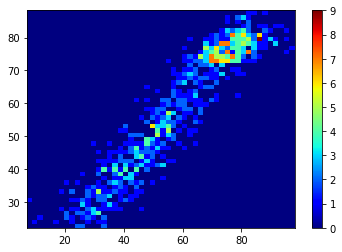

In [199]:
#Summary of Results

print('Linear Regression r2 score is', Score)
print('Linear Regression mean squared error is', Mse)
print('Linear Regression root mean squared error is', Rmse)
print('Linear Regression r2 score with pre-processing is', ScorePre)
print('Linear Regression mean squared error with pre-processing is', MsePre)
print('Linear Regression root mean squared error with pre-processing is', RmsePre)

print('K-Nearest Neighbour r2 score is', Score2)
print('K-Nearest Neighbour mean squared error is', Mse2)
print('K-Nearest Neighbour root mean squared error is', Rmse2)
print('K-Nearest Neighbour r2 score with pre-processing is', ScorePre2)
print('K-Nearest Neighbour mean squared error with pre-processing is', MsePre2)
print('K-Nearest Neighbour root mean squared error with pre-processing is', RmsePre2)

print('Random Forest r2 score is', Score3)
print('Random Forest mean squared error is', Mse3) #Should be low indicating low levels of noise
print('Random Forest root mean squared error is', Rmse3) 
print('Random Forest r2 score with pre-processing is', ScorePre3)
print('Random Forest mean squared error with pre-processing is', MsePre3)
print('Random Forest root mean squared error with pre-processing is', RmsePre3)
#Plotting Predictions

plt.figure(1)
plt.title('Actual Brain Age vs. Predicted Brain Age')
plt.xlabel('Predicted Brain Age')
plt.ylabel('Brain Age')
plt.scatter(y_prediction, y_test, label = 'Linear Regression', color = 'green')
plt.scatter(y2_prediction, y_test, label = 'KNN', color = 'red')
plt.scatter(y3_prediction, y_test, label = 'Random Forest', color = 'blue')
plt.legend(loc = 'lower right')

plt.figure(2)
plt.title('Actual Brain Age vs. Predicted Brain Age with Pre-processing')
plt.xlabel('Predicted Brain Age')
plt.ylabel('Brain Age')
plt.scatter(y_pred, Y_test, label = 'Linear Regression', color = 'green')
plt.scatter(y_pred2, Y_test, label = 'KNN', color = 'red')
plt.scatter(y_pred3, Y_test, label = 'Random Forest', color = 'blue')
plt.legend(loc = 'lower right')

plt.figure(3)
plt.hist2d(y_pred, y_pred2, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

plt.figure(4)
plt.hist2d(y_pred, y_pred3, (50, 50), cmap=plt.cm.jet)
plt.colorbar()